In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, BatchNormalization, Input, Embedding, Dot, Dense,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from wordcloud import WordCloud
%matplotlib inline



### Activation -> Relu, Sigmoid
### Normalization -> This helps us to speed up training and avoid overfitting
### Embedding -> Converts integer in Vector Embedding
### Flatten -> Multidimensional Inputs are converted in 1D vector
### Callbacks -> this runs during the model training, and it will save the modelcheckpoints()
### LearningRateScheular -> It Dynamically changes the learning rate
### Early Stopping -> Stops the training early to save time
### Input -> Used to add layers

In [12]:
import os

In [13]:
INPUT_DIR = os.path.join("..","artifacts","raw")

In [14]:
print(INPUT_DIR)

..\artifacts\raw


In [15]:
rating_df = pd.read_csv(INPUT_DIR+"/animelist.csv",low_memory=True, usecols=["user_id","anime_id","rating"])

In [16]:
rating_df.head()

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10


In [17]:
len(rating_df)

1048575

## Data Processing

In [18]:
dictionary = {"name":["joel","sanal","ram"],
              "age": [10, 20, 40]}

In [19]:
dictionary["name"]

['joel', 'sanal', 'ram']

In [20]:
n_ratings = rating_df["user_id"].value_counts()

In [21]:
n_ratings

user_id
781     3932
890     3812
3021    3102
1397    3072
1469    2916
        ... 
443        1
449        1
1360       1
1866       1
1569       1
Name: count, Length: 3292, dtype: int64

In [22]:
rating_df = rating_df[rating_df["user_id"].isin(n_ratings[n_ratings>=400].index)].copy()

In [23]:
len(rating_df)

666308

In [24]:
min_rating = min(rating_df["rating"])

In [25]:
max_rating = max(rating_df["rating"])

In [26]:
max_rating

10

In [27]:
avg_rating = np.mean(rating_df["rating"])

In [28]:
rating_df["rating"]

213         0
214        10
215         0
216         0
217         0
           ..
1048504     0
1048505     0
1048506     0
1048507     0
1048508     0
Name: rating, Length: 666308, dtype: int64

In [29]:
rating_df["rating"] = rating_df["rating"].apply(lambda x:(x-min_rating)/(max_rating- min_rating)).values.astype(np.float64)

In [30]:
rating_df["rating"].value_counts()

rating
0.0    302501
0.8     89013
0.7     85960
0.9     55614
0.6     46720
1.0     35826
0.5     25721
0.4     11700
0.3      5815
0.1      3864
0.2      3574
Name: count, dtype: int64

In [31]:
rating_df

,user_id,anime_id,rating
213,2,24833,0.0
214,2,235,1.0
215,2,36721,0.0
216,2,40956,0.0
217,2,31933,0.0
...,...,...,...
1048504,3578,34375,0.0
1048505,3578,34376,0.0
1048506,3578,34394,0.0
1048507,3578,35472,0.0


In [32]:
## check for duplicates
rating_df.duplicated().sum()

np.int64(0)

In [33]:
#missing values
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [34]:
user_ids = rating_df["user_id"].unique().tolist()

In [35]:
n_users = len(user_ids)

In [36]:
n_users

882

In [37]:
# 2 --> 1
# 5 --> 2

In [38]:
user2user_encoded = {x : i for i , x in enumerate(user_ids)}  #dictionary comprehension

In [39]:
user2user_encoded

{2: 0,
 6: 1,
 12: 2,
 16: 3,
 17: 4,
 19: 5,
 21: 6,
 41: 7,
 42: 8,
 44: 9,
 47: 10,
 53: 11,
 55: 12,
 60: 13,
 66: 14,
 73: 15,
 74: 16,
 85: 17,
 89: 18,
 90: 19,
 94: 20,
 98: 21,
 102: 22,
 108: 23,
 111: 24,
 112: 25,
 120: 26,
 121: 27,
 122: 28,
 135: 29,
 145: 30,
 146: 31,
 147: 32,
 153: 33,
 155: 34,
 156: 35,
 172: 36,
 174: 37,
 184: 38,
 190: 39,
 193: 40,
 194: 41,
 198: 42,
 204: 43,
 205: 44,
 209: 45,
 214: 46,
 219: 47,
 222: 48,
 227: 49,
 228: 50,
 235: 51,
 238: 52,
 240: 53,
 243: 54,
 248: 55,
 251: 56,
 252: 57,
 257: 58,
 264: 59,
 267: 60,
 272: 61,
 274: 62,
 275: 63,
 284: 64,
 285: 65,
 286: 66,
 290: 67,
 291: 68,
 293: 69,
 300: 70,
 301: 71,
 306: 72,
 308: 73,
 310: 74,
 313: 75,
 314: 76,
 316: 77,
 320: 78,
 321: 79,
 324: 80,
 325: 81,
 326: 82,
 327: 83,
 330: 84,
 336: 85,
 340: 86,
 345: 87,
 346: 88,
 349: 89,
 350: 90,
 366: 91,
 367: 92,
 371: 93,
 372: 94,
 375: 95,
 381: 96,
 382: 97,
 386: 98,
 389: 99,
 398: 100,
 405: 101,
 406: 102,
 

In [40]:
user2user_decoded = {i : x for i , x in enumerate(user_ids)}

In [41]:
user2user_decoded

{0: 2,
 1: 6,
 2: 12,
 3: 16,
 4: 17,
 5: 19,
 6: 21,
 7: 41,
 8: 42,
 9: 44,
 10: 47,
 11: 53,
 12: 55,
 13: 60,
 14: 66,
 15: 73,
 16: 74,
 17: 85,
 18: 89,
 19: 90,
 20: 94,
 21: 98,
 22: 102,
 23: 108,
 24: 111,
 25: 112,
 26: 120,
 27: 121,
 28: 122,
 29: 135,
 30: 145,
 31: 146,
 32: 147,
 33: 153,
 34: 155,
 35: 156,
 36: 172,
 37: 174,
 38: 184,
 39: 190,
 40: 193,
 41: 194,
 42: 198,
 43: 204,
 44: 205,
 45: 209,
 46: 214,
 47: 219,
 48: 222,
 49: 227,
 50: 228,
 51: 235,
 52: 238,
 53: 240,
 54: 243,
 55: 248,
 56: 251,
 57: 252,
 58: 257,
 59: 264,
 60: 267,
 61: 272,
 62: 274,
 63: 275,
 64: 284,
 65: 285,
 66: 286,
 67: 290,
 68: 291,
 69: 293,
 70: 300,
 71: 301,
 72: 306,
 73: 308,
 74: 310,
 75: 313,
 76: 314,
 77: 316,
 78: 320,
 79: 321,
 80: 324,
 81: 325,
 82: 326,
 83: 327,
 84: 330,
 85: 336,
 86: 340,
 87: 345,
 88: 346,
 89: 349,
 90: 350,
 91: 366,
 92: 367,
 93: 371,
 94: 372,
 95: 375,
 96: 381,
 97: 382,
 98: 386,
 99: 389,
 100: 398,
 101: 405,
 102: 406,
 

In [42]:
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)

In [43]:
rating_df

,user_id,anime_id,rating,user
213,2,24833,0.0,0
214,2,235,1.0,0
215,2,36721,0.0,0
216,2,40956,0.0,0
217,2,31933,0.0,0
...,...,...,...,...
1048504,3578,34375,0.0,881
1048505,3578,34376,0.0,881
1048506,3578,34394,0.0,881
1048507,3578,35472,0.0,881


In [44]:
rating_df.head()

,user_id,anime_id,rating,user
213,2,24833,0.0,0
214,2,235,1.0,0
215,2,36721,0.0,0
216,2,40956,0.0,0
217,2,31933,0.0,0


In [45]:
anime_ids = rating_df['anime_id'].unique().tolist()

In [46]:
anime_ids

[24833,
 235,
 36721,
 40956,
 31933,
 5042,
 7593,
 21,
 35446,
 24,
 22,
 38034,
 17251,
 5762,
 31580,
 33253,
 35028,
 9513,
 368,
 11633,
 31964,
 33486,
 31740,
 1470,
 1575,
 2904,
 1535,
 28223,
 226,
 38671,
 32872,
 15,
 71,
 7661,
 245,
 263,
 5258,
 270,
 24703,
 15451,
 8074,
 11061,
 28961,
 34542,
 14719,
 20899,
 26055,
 34933,
 37086,
 1604,
 22535,
 189,
 34599,
 29575,
 10620,
 32182,
 23755,
 20,
 1735,
 35581,
 5040,
 30276,
 34134,
 6893,
 11499,
 29786,
 16498,
 28171,
 32282,
 9253,
 3455,
 22319,
 10851,
 40658,
 29809,
 25397,
 2852,
 1635,
 1636,
 40337,
 39085,
 857,
 9721,
 36625,
 6987,
 8577,
 9849,
 4010,
 16642,
 41261,
 30614,
 4600,
 31101,
 4358,
 39068,
 10697,
 2251,
 32667,
 5081,
 34443,
 36225,
 24641,
 2871,
 972,
 2873,
 5347,
 1401,
 13223,
 889,
 10694,
 2413,
 36456,
 38408,
 36896,
 39565,
 42603,
 40472,
 38252,
 25667,
 5464,
 12293,
 37089,
 6558,
 17543,
 2352,
 37699,
 2025,
 14353,
 34497,
 21001,
 35120,
 18689,
 2432,
 7456,
 3324,

In [47]:
len(anime_ids)

13203

In [48]:
anime2anime_encoded = {x : i for i , x in enumerate(anime_ids)} 

In [49]:
anime2anime_encoded

{24833: 0,
 235: 1,
 36721: 2,
 40956: 3,
 31933: 4,
 5042: 5,
 7593: 6,
 21: 7,
 35446: 8,
 24: 9,
 22: 10,
 38034: 11,
 17251: 12,
 5762: 13,
 31580: 14,
 33253: 15,
 35028: 16,
 9513: 17,
 368: 18,
 11633: 19,
 31964: 20,
 33486: 21,
 31740: 22,
 1470: 23,
 1575: 24,
 2904: 25,
 1535: 26,
 28223: 27,
 226: 28,
 38671: 29,
 32872: 30,
 15: 31,
 71: 32,
 7661: 33,
 245: 34,
 263: 35,
 5258: 36,
 270: 37,
 24703: 38,
 15451: 39,
 8074: 40,
 11061: 41,
 28961: 42,
 34542: 43,
 14719: 44,
 20899: 45,
 26055: 46,
 34933: 47,
 37086: 48,
 1604: 49,
 22535: 50,
 189: 51,
 34599: 52,
 29575: 53,
 10620: 54,
 32182: 55,
 23755: 56,
 20: 57,
 1735: 58,
 35581: 59,
 5040: 60,
 30276: 61,
 34134: 62,
 6893: 63,
 11499: 64,
 29786: 65,
 16498: 66,
 28171: 67,
 32282: 68,
 9253: 69,
 3455: 70,
 22319: 71,
 10851: 72,
 40658: 73,
 29809: 74,
 25397: 75,
 2852: 76,
 1635: 77,
 1636: 78,
 40337: 79,
 39085: 80,
 857: 81,
 9721: 82,
 36625: 83,
 6987: 84,
 8577: 85,
 9849: 86,
 4010: 87,
 16642: 88,
 

In [50]:
anime2anime_decoded = {i : x for i , x in enumerate(anime_ids)} 

In [51]:
n_anime = len(anime2anime_encoded)

In [52]:
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)

In [53]:
rating_df

,user_id,anime_id,rating,user,anime
213,2,24833,0.0,0,0
214,2,235,1.0,0,1
215,2,36721,0.0,0,2
216,2,40956,0.0,0,3
217,2,31933,0.0,0,4
...,...,...,...,...,...
1048504,3578,34375,0.0,881,5948
1048505,3578,34376,0.0,881,5949
1048506,3578,34394,0.0,881,9131
1048507,3578,35472,0.0,881,5951


In [54]:
## bring randomness in our data
rating_df = rating_df.sample(frac=1, random_state=43).reset_index(drop=True)

In [55]:
rating_df.head()

,user_id,anime_id,rating,user,anime
0,2463,6882,0.0,615,7280
1,858,1719,0.0,228,729
2,264,14199,0.8,59,1637
3,970,28999,0.9,268,1153
4,1697,11235,0.7,441,2567


In [56]:
#splitting

In [57]:
X = rating_df[["user","anime"]].values
y = rating_df["rating"]

In [58]:
X

array([[ 615, 7280],
       [ 228,  729],
       [  59, 1637],
       ...,
       [ 743, 1300],
       [ 204,  555],
       [ 358,  699]])

In [59]:
y

0         0.0
1         0.0
2         0.8
3         0.9
4         0.7
         ... 
666303    0.0
666304    0.0
666305    0.6
666306    0.6
666307    0.0
Name: rating, Length: 666308, dtype: float64

In [60]:
rating_df.shape[0]

666308

In [61]:
test_size = 1000
train_indices = rating_df.shape[0] - test_size

In [62]:
train_indices

665308

In [63]:
X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [64]:
X_train.shape

(665308, 2)

In [65]:
y_train

0         0.0
1         0.0
2         0.8
3         0.9
4         0.7
         ... 
665303    0.0
665304    0.8
665305    0.0
665306    1.0
665307    0.7
Name: rating, Length: 665308, dtype: float64

In [66]:
X_train

array([[ 615, 7280],
       [ 228,  729],
       [  59, 1637],
       ...,
       [ 705,  953],
       [ 268, 1027],
       [ 233, 2197]])

In [67]:
X_train_array = [X_train[:,0] , X_train[:,1]]

In [68]:
X_train_array

[array([615, 228,  59, ..., 705, 268, 233]),
 array([7280,  729, 1637, ...,  953, 1027, 2197])]

In [69]:
X_test_array = [X_test[:,0] , X_test[:,1]]

In [70]:
type(X_train_array)

list

#### Model Training Architecture

In [71]:
def RecommenderNet():
    embedding_size = 128

    user = Input(name="user", shape=[1])

    user_embedding = Embedding(name="user_embedding", input_dim=n_users, output_dim=embedding_size)(user)

    anime = Input(name="anime",shape=[1])

    anime_embedding = Embedding(name="anime_embedding", input_dim=n_anime, output_dim=embedding_size)(anime)

    x = Dot(name="dot_product", normalize=True, axes=2)([user_embedding,anime_embedding])

    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs=[user,anime], outputs=x)

    model.compile(loss='binary_crossentropy', metrics=["mae","mse"],optimizer='Adam')

    return model


In [72]:
model = RecommenderNet()

In [73]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │    112,896 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_embedding     │ (None, 1, 128)    │  1,689,984 │ anime[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1, 1)      │          0 │ user_embedding[0… │
│                     │                   │            │ anime_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1)      │          2 │ dot_product[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1, 1)      │          4 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 1)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,802,886 (6.88 MB)

 Trainable params: 1,802,884 (6.88 MB)

 Non-trainable params: 2 (8.00 B)

In [74]:
# this to be find best learning rate
start_lr = 0.00001
min_lr = 0.0001
max_lr = 0.00005
batch_size = 10000

ramup_epochs = 5
sustain_epochs = 0
exp_decay = 0.8

def lrfn(epoch):
    if epoch<ramup_epochs:
        return (max_lr-start_lr)/ramup_epochs*epoch + start_lr
    elif epoch<ramup_epochs+sustain_epochs:
        return max_lr
    else:
        return (max_lr-min_lr) * exp_decay ** (epoch-ramup_epochs-sustain_epochs)+min_lr

In [75]:
lr_callback = LearningRateScheduler(lambda epoch:lrfn(epoch) , verbose=0)
checkpoint_filepath = './weights.weights.h5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor="val_loss",mode="min",save_best_only=True)

early_stopping = EarlyStopping(patience=3,monitor="val_loss",mode="min",restore_best_weights=True)

In [76]:
my_callbacks = [model_checkpoint,lr_callback,early_stopping]

In [77]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data = (X_test_array,y_test),
    callbacks=my_callbacks
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.8014 - mae: 0.3877 - mse: 0.2020 - val_loss: 0.6952 - val_mae: 0.3602 - val_mse: 0.1571 - learning_rate: 1.0000e-05
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.7995 - mae: 0.3872 - mse: 0.2015 - val_loss: 0.6987 - val_mae: 0.3599 - val_mse: 0.1587 - learning_rate: 1.8000e-05
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.7967 - mae: 0.3856 - mse: 0.2000 - val_loss: 0.7052 - val_mae: 0.3603 - val_mse: 0.1617 - learning_rate: 2.6000e-05
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.7920 - mae: 0.3838 - mse: 0.1983 - val_loss: 0.7156 - val_mae: 0.3613 - val_mse: 0.1662 - learning_rate: 3.4000e-05


In [78]:
model.load_weights(checkpoint_filepath)

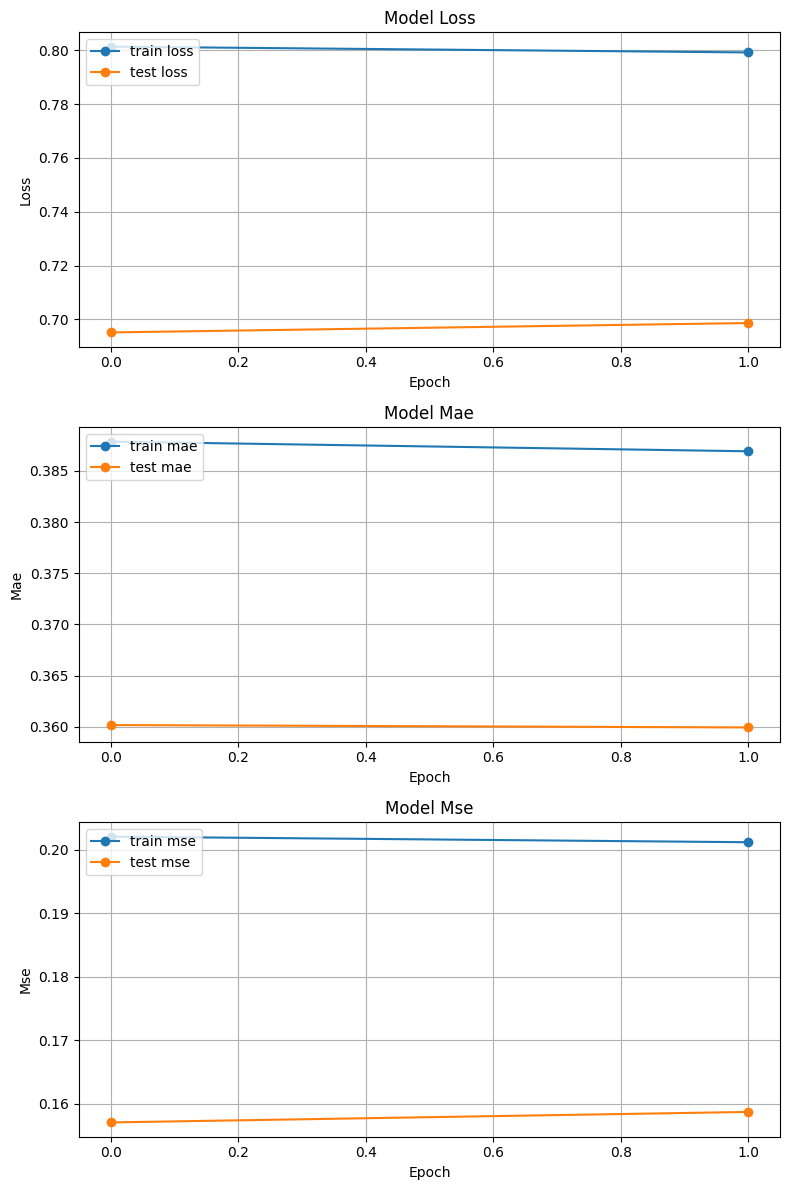

In [79]:
metrics = ["loss", "mae", "mse"]

# Create subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(8, len(metrics) * 4))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(history.history[metric][0:-2], marker="o", label=f"train {metric}")
    ax.plot(history.history[f"val_{metric}"][0:-2], marker="o", label=f"test {metric}")
    ax.set_title(f"Model {metric.capitalize()}")
    ax.set_ylabel(metric.capitalize())
    ax.set_xlabel("Epoch")
    ax.legend(loc="upper left")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [80]:
def extract_weights(name,model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights/np.linalg.norm(weights,axis=1).reshape((-1,1))
    return weights

In [81]:
anime_weights = extract_weights("anime_embedding",model)

In [82]:
anime_weights 

array([[ 0.06778646, -0.06618706, -0.04256699, ..., -0.05285066,
        -0.02307579,  0.12848164],
       [ 0.04599392,  0.04377286, -0.0379348 , ...,  0.09006662,
         0.10487015, -0.07299855],
       [-0.10732785,  0.00918618,  0.03113236, ..., -0.00550177,
         0.00404265, -0.04600858],
       ...,
       [ 0.09352321,  0.00218697, -0.14367467, ..., -0.10833447,
         0.04293896, -0.05347054],
       [ 0.04531955,  0.00922303, -0.01207456, ..., -0.11842674,
        -0.13118152,  0.00723894],
       [-0.13977116,  0.09674139,  0.06078746, ..., -0.03602972,
         0.09877716,  0.07661954]], dtype=float32)

In [83]:
user_weights = extract_weights("user_embedding",model)

In [84]:
user_weights

array([[ 0.06975073, -0.0927403 , -0.1152157 , ..., -0.08088893,
        -0.12688793,  0.04522339],
       [-0.06739967,  0.11615623,  0.1073123 , ...,  0.03927069,
         0.02561988,  0.02526111],
       [-0.10511336, -0.12410536,  0.00710774, ...,  0.15009499,
        -0.02741409,  0.03185653],
       ...,
       [-0.13980319,  0.08966633, -0.1270306 , ..., -0.11916746,
        -0.01330802,  0.15014   ],
       [-0.04197053,  0.13020301, -0.1256325 , ..., -0.08098929,
         0.0126933 , -0.1290705 ],
       [ 0.1616955 ,  0.06939534, -0.11473921, ...,  0.02580441,
        -0.04981107,  0.09219159]], dtype=float32)

## Anime CSV

In [85]:
df = pd.read_csv(INPUT_DIR+"/anime.csv",low_memory=True)
df.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [86]:
df = df.replace("Unknown",np.nan)

In [87]:
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print("Error")
    return name

In [88]:
df["anime_id"] = df["MAL_ID"]
df["eng_version"] = df["English name"]
df["eng_version"] = df.anime_id.apply(lambda x:getAnimeName(x))

In [89]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id,eng_version
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5,Cowboy Bebop:The Movie
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6,Trigun
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7,Witch Hunter Robin
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8,Beet the Vandel Buster


In [90]:
getAnimeName(27)

'Trinity Blood'

In [91]:
df.sort_values(by=["Score"],
               inplace=True,
               ascending=False,
               kind="quicksort",
               na_position="last")

In [92]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'anime_id',
       'eng_version'],
      dtype='object')

In [93]:
df = df[["anime_id" , "eng_version","Score","Genres","Episodes","Type","Premiered","Members"]]

In [94]:
df.head(3)

,anime_id,eng_version,Score,Genres,Episodes,Type,Premiered,Members
3971,5114,Fullmetal Alchemist:Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",64,TV,Spring 2009,2248456
15926,40028,Attack on Titan Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",16,TV,Winter 2021,733260
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",24,TV,Spring 2011,1771162


In [95]:
def getAnimeFrame(anime,df):
    if isinstance(anime,int):
        return df[df.anime_id == anime]
    if isinstance(anime,str):
        return df[df.eng_version == anime]

In [96]:
getAnimeFrame(40028 , df)

,anime_id,eng_version,Score,Genres,Episodes,Type,Premiered,Members
15926,40028,Attack on Titan Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",16,TV,Winter 2021,733260


In [97]:
getAnimeFrame('Trinity Blood' , df)

,anime_id,eng_version,Score,Genres,Episodes,Type,Premiered,Members
17,27,Trinity Blood,7.32,"Action, Supernatural, Vampire",24,TV,Spring 2005,158343


#### ANIME_WITH_SYNOPSIS.CSV 

In [98]:
cols = ["MAL_ID","Name","Genres","sypnopsis"]

In [99]:
synopsis_df = pd.read_csv(INPUT_DIR+"/anime_with_synopsis.csv",usecols=cols)

In [100]:
synopsis_df.head()

,MAL_ID,Name,Genres,sypnopsis
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [101]:
def getSynopsis(anime,synopsis_df):
    if isinstance(anime,int):
        return synopsis_df[synopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime,str):
        return synopsis_df[synopsis_df.Name == anime].sypnopsis.values[0]

In [102]:
getSynopsis(40028 , synopsis_df)

"Gabi Braun and Falco Grice have been training their entire lives to inherit one of the seven titans under Marley's control and aid their nation in eradicating the Eldians on Paradis. However, just as all seems well for the two cadets, their peace is suddenly shaken by the arrival of Eren Yeager and the remaining members of the Survey Corps. Having finally reached the Yeager family basement and learned about the dark history surrounding the titans, the Survey Corps has at long last found the answer they so desperately fought to uncover. With the truth now in their hands, the group set out for the world beyond the walls. In Shingeki no Kyojin: The Final Season , two utterly different worlds collide as each party pursues its own agenda in the long-awaited conclusion to Paradis' fight for freedom."

In [103]:
getSynopsis("Steins;Gate",synopsis_df)

'The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in Akihabara, where he indulges himself in his hobby of inventing prospective "future gadgets" with fellow lab members: Mayuri Shiina, his air-headed childhood friend, and Hashida Itaru, a perverted hacker nicknamed "Daru." The three pass the time by tinkering with their most promising contraption yet, a machine dubbed the "Phone Microwave," which performs the strange function of morphing bananas into piles of green gel. Though miraculous in itself, the phenomenon doesn\'t provide anything concrete in Okabe\'s search for a scientific breakthrough; that is, until the lab members are spurred into action by a string of mysterious happenings before stumbling upon an unexpected success—the Phone Microwave can send emails to the past, altering the flow of history. Adapted from the critically acclaimed visual novel by 5pb. and Nitroplus, Steins;Gate takes Okabe through the depths of scientific theory 

### CONTENT/ITEM BASED RECOMMENDATION

In [104]:
pd.set_option("max_colwidth",None)

In [105]:
def find_similar_animes(name, anime_weights, anime2anime_encoded, anime2anime_decoded, df, synopsis_df, n=10, return_dist=False, neg=False):
    # Get the anime_id for the given name
    index = getAnimeFrame(name, df).anime_id.values[0]
    encoded_index = anime2anime_encoded.get(index)

    if encoded_index is None:
        raise ValueError(f"Encoded index not found for anime ID: {index}")

    weights = anime_weights

    # Compute the similarity distances
    dists = np.dot(weights, weights[encoded_index])  # Ensure weights[encoded_index] is a 1D array
    sorted_dists = np.argsort(dists)

    n = n + 1

    # Select closest or farthest based on 'neg' flag
    if neg:
        closest = sorted_dists[:n]
    else:
        closest = sorted_dists[-n:]

    # Return distances and closest indices if requested
    if return_dist:
        return dists, closest

    # Build the similarity array
    SimilarityArr = []
    for close in closest:
        decoded_id = anime2anime_decoded.get(close)
       

       
        anime_frame = getAnimeFrame(decoded_id, df)

        anime_name = anime_frame.eng_version.values[0]
        genre = anime_frame.Genres.values[0]
        similarity = dists[close]
   

        SimilarityArr.append({
            "anime_id": decoded_id,
            "name": anime_name,
            "similarity": similarity,
            "genre": genre,
        })
       

    # Create a DataFrame with results and sort by similarity
    Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
    return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)


In [106]:
find_similar_animes(
    "Trinity Blood",
    anime_weights,
    anime2anime_encoded,
    anime2anime_decoded,
    df,
    synopsis_df,
)

,name,similarity,genre
9,The Gokusen,0.325653,"Slice of Life, Comedy, Drama, School, Josei"
8,Nyanfuru,0.323743,"Music, Comedy"
7,Infini-T Force Movie: Gatchaman - Saraba Tomo yo,0.313546,"Action, Sci-Fi, Seinen, Super Power"
6,Usuzumizakura: Garo,0.309689,"Action, Demons, Fantasy, Magic, Supernatural"
5,Aooni the Movie,0.306254,"Mystery, Horror"
4,Mou Hasamazu ni wa Irarenai♥: Hoshi ni Onegai shitara Konnani Okkiku Nacchatta!,0.298839,Hentai
3,Black Blood Brothers,0.290044,"Action, Comedy, Fantasy, Shounen, Supernatural, Vampire"
2,Non Non Biyori,0.287990,"Comedy, School, Seinen, Slice of Life"
1,Detective Conan Movie 14: The Lost Ship in the Sky,0.287528,"Action, Mystery, Police, Shounen"
0,Begone Bell Care; Begone Dull Care,0.286158,Music


### USER BASED RECOMMENDATION

In [107]:
def find_similar_users(item_input , user_weights , user2user_encoded , user2user_decoded, n=10 , return_dist=False,neg=False):
    try:
        index=item_input
        encoded_index = user2user_encoded.get(index)

        weights = user_weights

        dists = np.dot(weights,weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n=n+1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
            

        if return_dist:
            return dists,closest
        
        SimilarityArr = []

        for close in closest:
            similarity = dists[close]

            if isinstance(item_input,int):
                decoded_id = user2user_decoded.get(close)
                SimilarityArr.append({
                    "similar_users" : decoded_id,
                    "similarity" : similarity
                })
        similar_users = pd.DataFrame(SimilarityArr).sort_values(by="similarity",ascending=False)
        similar_users = similar_users[similar_users.similar_users != item_input]
        return similar_users
    except Exception as e:
        print("Error Occured",e)

        
        

In [108]:
find_similar_users(int(2),user_weights,user2user_encoded,user2user_decoded)

,similar_users,similarity
9,3363,0.284765
8,2557,0.273468
7,746,0.267384
6,2353,0.253266
5,943,0.248640
4,770,0.236499
3,2656,0.235960
2,2559,0.227300
1,493,0.215594
0,2346,0.213500


In [109]:
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700,height=400,background_color='white',colormap='gnuplot').generate_from_frequencies(all_genres)
    plt.figure(figsize=(10,8))
    plt.imshow(genres_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [110]:
from collections import defaultdict

In [111]:
def getFavGenre(frame , plot=False):
    frame.dropna(inplace=False)
    all_genres = defaultdict(int)

    genres_list = []
    for genres in frame["Genres"]:
        if isinstance(genres,str):
            for genre in genres.split(','):
                genres_list.append(genre)
                all_genres[genre.strip()] += 1

    if plot:
        showWordCloud(all_genres)
    
    return genres_list

In [112]:
rating_df.head(2)

,user_id,anime_id,rating,user,anime
0,2463,6882,0.0,615,7280
1,858,1719,0.0,228,729


In [113]:
def get_user_preferences(user_id , rating_df , df ,plot=False):

    animes_watched_by_user = rating_df[rating_df.user_id == user_id]

    user_rating_percentile = np.percentile(animes_watched_by_user.rating , 75)

    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]

    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating" , ascending=False).anime_id.values
    )

    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version","Genres"]]

    if plot:
        getFavGenre(anime_df_rows,plot)


    return anime_df_rows

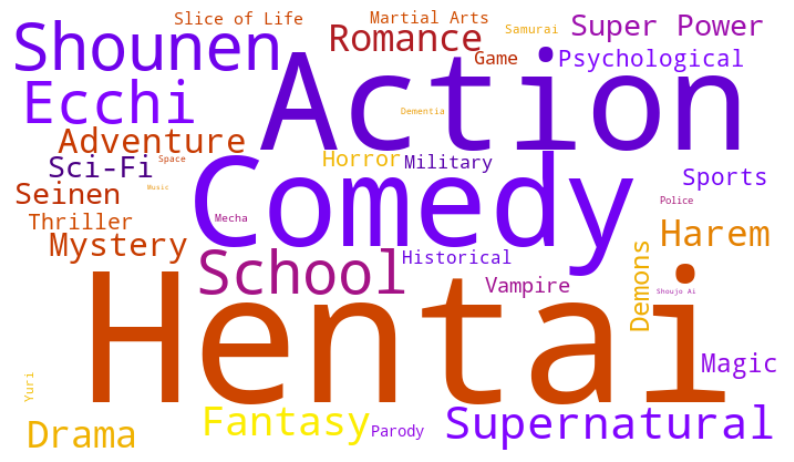

,eng_version,Genres
3971,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen"
5683,Steins;Gate,"Thriller, Sci-Fi"
14963,Attack on Titan Season 3 Part 2,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power"
6474,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power"
6006,Gintama Season 2,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen"
...,...,...
5471,The Qwaser Of Stigmata Picture Drama,Ecchi
15162,Yue ni Hitozuma wa Netorareta.,Hentai
8361,Kansen: Ball Buster The Animation,Hentai
6161,Kyuuketsuki,"Hentai, Vampire"


In [114]:
get_user_preferences(2 , rating_df, df , plot=True)

In [115]:
### HYBRID RECOMMENDER SYSTEM

In [116]:
def get_user_recommendations(similar_users , user_pref ,df , synopsis_df, rating_df, n=10):

    recommended_animes = []
    anime_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id) , rating_df, df)

        pref_list = pref_list[~pref_list.eng_version.isin(user_pref.eng_version.values)]

        if not pref_list.empty:
            anime_list.append(pref_list.eng_version.values)

    if anime_list:
            anime_list = pd.DataFrame(anime_list)

            sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)

            for i,anime_name in enumerate(sorted_list.index):
                n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]

                if isinstance(anime_name,str):
                    frame = getAnimeFrame(anime_name,df)
                    anime_id = frame.anime_id.values[0]
                    genre = frame.Genres.values[0]
                    synopsis = getSynopsis(int(anime_id),synopsis_df)

                    recommended_animes.append({
                        "n" : n_user_pref,
                        "anime_name" : anime_name,
                        "Genres" : genre,
                        "Synopsis": synopsis
                    })
    return pd.DataFrame(recommended_animes).head(n)
            



    

In [117]:
def hybrid_recommendation(user_id , user_weight=0.5, content_weight =0.5):

    ## User Recommndation

    similar_users =find_similar_users(user_id,user_weights,user2user_encoded,user2user_decoded)
    user_pref = get_user_preferences(user_id , rating_df, df)
    user_recommended_animes =get_user_recommendations(similar_users,user_pref,df, synopsis_df,rating_df)
    

    user_recommended_anime_list = user_recommended_animes["anime_name"].tolist()
    print(user_recommended_anime_list)

    #### Content recommendation
    content_recommended_animes = []

    for anime in user_recommended_anime_list:
        similar_animes = find_similar_animes(anime, anime_weights, anime2anime_encoded, anime2anime_decoded, df, synopsis_df)

        if similar_animes is not None and not similar_animes.empty:
            content_recommended_animes.extend(similar_animes["name"].tolist())
        else:
            print(f"No similar anime found {anime}")
    
    combined_scores = {}

    for anime in user_recommended_anime_list:
        combined_scores[anime] = combined_scores.get(anime,0) + user_weight

    for anime in content_recommended_animes:
        combined_scores[anime] = combined_scores.get(anime,0) + content_weight  

    sorted_animes = sorted(combined_scores.items() , key=lambda x:x[1] , reverse=True)

    return [anime for anime , score in sorted_animes[:10]] 



In [118]:
similar_users =find_similar_users(int(11880),user_weights,user2user_encoded,user2user_decoded)

Error Occured shapes (882,128) and (1,882,128) not aligned: 128 (dim 1) != 882 (dim 1)


In [119]:
hybrid_recommendation(2)

['Bakuman.', 'Angel Beats!', 'Little Witch Academia', 'No Game, No Life', 'Your Name.', 'Nisekoi:False Love', 'Re:ZERO -Starting Life in Another World-', 'Gurren Lagann', 'Is It Wrong to Try to Pick Up Girls in a Dungeon?', "Kuroko's Basketball"]


['Bitch Gakuen ga Seijun na Hazu ga Nai!!? The Animation',
 'Bakuman.',
 'Angel Beats!',
 'Little Witch Academia',
 'No Game, No Life',
 'Your Name.',
 'Nisekoi:False Love',
 'Re:ZERO -Starting Life in Another World-',
 'Gurren Lagann',
 'Is It Wrong to Try to Pick Up Girls in a Dungeon?']